# Performance Evaluation of Bandit Learning Algorithms
**Author:**  

Li Ge (2022533011，李舸)  

Long Yuxuan (2022533034, 龙宇轩)  

(In lexicographic order)

**Contribution:**

李舸：part I主要代码及分析部分, part II task2反例

龙宇轩: part I绘图部分及图像结论, part II主要代码及分析部分

以下文档内容均为两人讨论后的结果

(In lexicographic order)

## Part I: Classical Bandit Algorithms

### Some necessary Python code:

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import math
import random

# Setting the time slots
N = 5000
# Setting the number of trials
trialNumber = 200
# Setting the number of arms
armNumber = 3
# Setting the Bernoulli distribution parameter for each arm
theta = [0.7, 0.5, 0.4]

# Sampling from Bernoulli distribution with parameter p
def bernSample(p):
    u = np.random.uniform(0,1)
    if u <= p:
        sample = 1
    else:
        sample = 0
    return sample

# Sampling from Beta distribution with parameters a and b
def betaSample(a, b):
    sample = np.random.beta(a, b)
    return sample

### Computing the theoretically maximized expectation of aggregate rewards over $N$ time slots (the oracle value):
$$
E = N \cdot \max{\{0.7, 0.5, 0.4\}} = 3500
$$

### Implementing the classical bandit algorithms:

#### 1. $\epsilon$-greedy Algorithm (0 ≤ $\epsilon$ ≤ 1):

In [132]:
# Epsilon-Greedy Algorithm (0 ≤ epsilon ≤ 1)
# randomly chosen from{1,2,3}
def randomChoose():
    u = np.random.uniform(0,1)
    if u <= 1/3:
        return 0
    elif u <= 2/3:
        return 1
    else:
        return 2

# The Algorithm    
def epsilonGreedy(epsilon):
    totalRegret = 0
    totalReward = 0
    for trial in range(trialNumber):
        # Initializing the variables
        rewards = np.zeros(N)
        reward = 0
        count = np.zeros(armNumber)
        estimatedMeans = np.zeros(armNumber)
        # Conducting the experiment
        for i in range(N): # i starts from 0, ends at N-1
            # Select and pull the arm
            u = np.random.uniform(0,1)
            if u <= epsilon:
                arm = randomChoose()
            else:
                arm = np.argmax(estimatedMeans)
            # Update the information
            rewards[i] = bernSample(theta[arm])
            reward += rewards[i]
            count[arm] += 1
            estimatedMeans[arm] += (rewards[i] - estimatedMeans[arm])/count[arm]
        totalRegret += 0.7*N - reward
        totalReward += reward
    meanRegret = totalRegret/trialNumber
    meanReward = totalReward/trialNumber
    resualt = [meanReward, meanRegret]
    return resualt

print("Epsilon-greedy Algorithm (0 ≤ epsilon ≤ 1):")

output = epsilonGreedy(0.1)
print("\nEpsilon = 0.1:")
print("Mean aggregated rewards: %f" %(output[0]))
print("Mean regret: %f" %(output[1]))

output = epsilonGreedy(0.5)
print("\nEpsilon = 0.5:")
print("Mean aggregated rewards: %f" %(output[0]))
print("Mean regret: %f" %(output[1]))

output = epsilonGreedy(0.9)
print("\nEpsilon = 0.9:")
print("Mean aggregated rewards: %f" %(output[0]))
print("Mean regret: %f" %(output[1]))

Epsilon-greedy Algorithm (0 ≤ epsilon ≤ 1):

Epsilon = 0.1:
Mean aggregated rewards: 3178.035000
Mean regret: 321.965000

Epsilon = 0.5:
Mean aggregated rewards: 2912.020000
Mean regret: 587.980000

Epsilon = 0.9:
Mean aggregated rewards: 2650.320000
Mean regret: 849.680000


#### 2. UCB (Upper Confidence Bound) Algorithm:

In [26]:
# UCB (Upper Confidence Bound) Algorithm
def ucb(c):
    totalRegret = 0
    totalReward = 0
    for trial in range(trialNumber):
        # Initializing the variables
        rewards = np.zeros(N)
        reward = 0
        count = np.zeros(armNumber)
        estimatedMeans = np.zeros(armNumber)
        # Conducting the experiment
        for i in range(N): # i starts from 0, ends at N-1
            if i < armNumber:
                rewards[i] = bernSample(theta[i])
                reward += rewards[i]
                count[i] += 1
                estimatedMeans[i] = rewards[i]
            else:
                # Select and pull the arm
                ucb = np.zeros(armNumber)
                ucb[0] = estimatedMeans[0] + c * np.sqrt(2*np.log(i)/count[0])    
                ucb[1] = estimatedMeans[1] + c * np.sqrt(2*np.log(i)/count[1])
                ucb[2] = estimatedMeans[2] + c * np.sqrt(2*np.log(i)/count[2])
                arm = np.argmax(ucb)
                # Update the information
                rewards[i] = bernSample(theta[arm])
                reward += rewards[i]
                count[arm] += 1
                estimatedMeans[arm] += (rewards[i] - estimatedMeans[arm])/count[arm]
        totalRegret += 0.7*N - reward
        totalReward += reward
    meanRegret = totalRegret/trialNumber
    meanReward = totalReward/trialNumber
    resualt = [meanReward, meanRegret]
    return resualt

print("UCB (Upper Confidence Bound) Algorithm:")

output = ucb(1)
print("\nc = 1:")
print("Mean aggregated rewards: %f" %(output[0]))
print("Mean regret: %f" %(output[1]))

output = ucb(5)
print("\nc = 5:")
print("Mean aggregated rewards: %f" %(output[0]))
print("Mean regret: %f" %(output[1]))

output = ucb(10)
print("\nc = 10:")
print("Mean aggregated rewards: %f" %(output[0]))
print("Mean regret: %f" %(output[1]))

UCB (Upper Confidence Bound) Algorithm:

c = 1:
Mean aggregated rewards: 3408.260000
Mean regret: 91.740000

c = 5:
Mean aggregated rewards: 2982.380000
Mean regret: 517.620000

c = 10:
Mean aggregated rewards: 2825.430000
Mean regret: 674.570000


#### 3. TS (Thompson Sampling) Algorithm

In [7]:
# TS (Thompson Sampling) Algorithm
def ts(a1, b1, a2, b2, a3, b3):
    prior = [[a1, b1], [a2, b2], [a3, b3]]
    totalRegret = 0
    totalReward = 0
    for trial in range(trialNumber):
        # Initializing the variables
        rewards = np.zeros(N)
        reward = 0
        estimatedMeans = np.zeros(armNumber)
        # Conducting the experiment
        for i in range(N): # i starts from 0, ends at N-1
            # Sample model
            for eachArm in range(armNumber):
                estimatedMeans[eachArm] = betaSample(prior[eachArm][0], prior[eachArm][1])
            # Select and pull the arm
            arm = np.argmax(estimatedMeans)
            # Update the Beta distribution
            output = bernSample(theta[arm])
            prior[arm][0] += output
            prior[arm][1] += 1 - output
            # Update the information
            rewards[i] = output
            reward += rewards[i]
        totalRegret += 0.7*N - reward
        totalReward += reward
    meanRegret = totalRegret/trialNumber
    meanReward = totalReward/trialNumber
    resualt = [meanReward, meanRegret]
    return resualt

print("TS (Thompson Sampling) Algorithm:")

output = ts(1, 1, 1, 1, 1, 1)
print("\nPrior parameter: {(1, 1), (1, 1), (1, 1)}:")
print("Mean aggregated rewards: %f" %(output[0]))
print("Mean regret: %f" %(output[1]))

output = ts(601, 401, 401, 601, 2, 3)
print("\nPrior parameter: {(601, 401), (401, 601), (2, 3)}:")
print("Mean aggregated rewards: %f" %(output[0]))
print("Mean regret: %f" %(output[1]))

TS (Thompson Sampling) Algorithm:

Prior parameter: {(1, 1), (1, 1), (1, 1)}:
Mean aggregated rewards: 3500.735000
Mean regret: -0.735000

Prior parameter: {(601, 401), (401, 601), (2, 3)}:
Mean aggregated rewards: 3497.585000
Mean regret: 2.415000


### Comparison and analysis:
1. The results of the three algorithms:    

| Algorithms                       | $\epsilon$-greedy           | UCB                   | TS                                           |
| -------------------------------- | --------------------------- | --------------------- | -------------------------------------------- |
| Runtime(approximation, per test) | 3.6s                        | 6.6s                  | 3.9s                                         | 
| Mean Regret                      | $\epsilon=0.1$: 86.415000   | $c = 1$: 91.740000    | {(1, 1), (1, 1), (1, 1)}: -0.735000        |
| Mean Regret                      | $\epsilon=0.5$: 421.590000  | $c = 5$: 517.620000   | {(601, 401), (401, 601), (2, 3)}: 2.415000 |
| Mean Regret                      | $\epsilon=0.9$: 752.195000  | $c = 10$: 674.570000  |    /                                          |

   - The results derived by the $\epsilon$-greedy Algorithm and UCB Algorithm by the given parameters are very close. Going deeper, we may conclude that $\epsilon$-greedy Algorithm is slightly better (with less regret) with small $\epsilon (\text{e.g. } \epsilon \leq 0.5)$, and the UCB Algorithm might perform better with larger constant $c (\text{e.g. } c \geq 10)$.
     
   - As for the TS Algorithm, it's obviously better (with much less regret) than the other two algorithms.  
   
   - The $\epsilon$-greedy Algorithm and TS Algorithm have close runtime, and they are both faster than $\epsilon$-greedy Algorithm. (The runtime here and in the table above may vary from different machines, and it's calculated within a single test (consider only one parameter).)
   
   More detailed analysis for the algorithm **resides as follows**, together with the analysis of their parameters.

2. The impacts of their parameters and deeper analysis:  
   
   **NOTICE: For the cohesion of this essay, the curve of the relation between the regret and different choices of parameters resides in the next part - "Understanding of the exploration-exploitation trade-off". Here we just elucidate our idea with natural language.**  

   - $\epsilon$: The regret increases as $\epsilon$ increases and it's almost linear relation (worst among the three algorithm). Since the randomly generated number $u \leq \epsilon$ determines that we do random choice (exploration phase) rather than conducting exploitation, we may derive the conclusion that relatively more exploitation work leads to less regret.  

      The reason that this algorithm has a linear worst-case regret is that since it's equally possible to choose each arm, when choosing the third arm (the arm with lowest probability to give reward) every time as the worst case, the regret increments by a constant 0.3 each round. 
   
   - $c$: The regret increases as $c$ increases with sublinear relation (better than the $\epsilon$-greedy Algorithm). We can derive the conclusion that: when quantitatively delimiting the confidence interval (by multiplying with a constant $c$), the smaller the constant is, the less regret it may cause. Also the constant cannot be too small, or the update is trivial and we may conversely have higher chance to choose those suboptimal arms.   
   
      This algorithm is also intuitively reasonable, since every time we update the information of an arm, the corresponding confidence interval swells, with a higher confidence level. Therefore, the case that the upper bound of one interval is greater than the other is actually more credible and strict, which accounts for the reasonableness of this algorithm.
     
      Let's put more consideration on the confidence interval delimitation, both quantitatively and qualitatively:
      We cite the conclusion from Bandit Algorithms (T. Lattimore & C. Szepesvari, 2020. Page 117):   
      
      *For any 1-subgaussian bandit with Algorithm:* $A_t = \text{arg max}_{i}(\widehat{\mu_i}(t+1) + \sqrt{\dfrac{2\log{f(t)}}{T_i(t-1)}})$, where $f(t) = 1 + t\log^2{(t)}$, *the regret $R_n$ satisfies:*  
      
      $$
      R_n \leq  \sum_{i:\Delta_i > 0}  \inf_{\varepsilon\in(0, \Delta_i)}\Delta_i(1+\dfrac{5}{\varepsilon^2} + \dfrac{2(\log{f(n) + \sqrt{\pi\log{f(n)}} + 1})}{{(\Delta_i - \varepsilon)}^2})
      $$
      
      where $\Delta_i$ is the difference between the max expectation and the real reward in each round.    

      *"This algorithm leads the regret to a constant and such that governs the asymptotic rate of growth of regret."* This asymptotic bound is merely achieved by modifying the delimitation of the confidence interval (instead of letting $f(t) = t$ in the version of UCB provided for us), and *"it's unimprovable in a strong sense."*   

      This version is better than the origin version: Quantitatively, the regret is lower. Qualitatively, since it leads the regret to a constant (the asymptotic bound), it has better performance especially when time slot is large.
   
   - $\alpha_j, \beta_j$ (defined for the prior distribution): Our analysis is based on the conjugacy of beta distribution. 
      - If $\alpha_j$ and $\beta_j$ are both small numbers (as shown in the case $\{(1, 1), (1, 1), (1, 1)\}$), the later experiments can have a big effect on the distribution. 
   
      - If $\alpha_j$ or $\beta_j$ is large numbers (as shown in the case $\{(601, 401), (401, 601), (2, 3)\}$), the later experiments would have little effect, especially during the first few experiments. This can be easily explained by the conjugacy of beta distribution: for the posterior distribution $\text{Beta}(a+k, b+n-k)$, $k$ and $n$ have little effect if $a$ or $b$ is large numbers. 
   
      More analysis for this algorithm: In spite of the little difference in the table, the two cases actually perform similarly after we run this algorithm for several times. Since the first case with $\{(1, 1), (1, 1), (1, 1)\}$ actually maximizes the effect of the later experiments, we conjectured that the output of the second case still being close is because the choice of the prior distribution for the large numbers $\{(601, 401), (401, 601)\}$ obeys the actual probability (oracle value) relation, which leads to similar result as the first case.  
      
      Given the analysis above, we could learn that the choice of the prior distribution is extremely crucial. Since we have no idea of the exact distribution for each arm, we had better set the parameters of the prior distribution $\alpha_j, \beta_j$ as small as possible, e.g. $(1, 1)$. This is aimed to weaken the awful impact of large parameters, since if the prior distribution of large parameters is disparate from the actual distribution (e.g. $\text{Beta}(200, 800)$ with actual distribution $\text{Bern}(0.9)$), the offset is overly hard to correct, and the incipient experiments may cause a great deal of regret. This is shown in the code snippet below with a blast regret of **1000.570000**!  

      Furthermore, this algorithm does not provide us with deterministic choice like the first two algorithms, instead, it offers us a distribution for the next movement. This "random choice" performs well when the environment is no more stochastic. Specifically, when the environment can conversely "exploit" **us** by observing our past choices and minimize our reward accordingly, a randomly generated movement is the only approach to deriving a sublinear worst-case regret (Bandit Algorithms, T. Lattimore & C. Szepesvari, 2020. Page 149), which is widely used in dealing with Adversarial Bandits.

In [10]:
# If the prior distribution has large parameters and is disparate from the actual distribution (oracle value)
output = ts(200, 800, 800, 200, 2, 3)
print("\nPrior parameter: {(200, 800), (800, 200), (2, 3)}:")
print("Mean aggregated rewards: %f" %(output[0]))
print("Mean regret: %f" %(output[1]))


Prior parameter: {(200, 800), (800, 200), (2, 3)}:
Mean aggregated rewards: 2499.430000
Mean regret: 1000.570000


### Understanding of the exploration-exploitation trade-off:
It's significant that we choose a proper algorithm and parameters. The idea that drives us to designing the exploration-exploitation mechanism is to lower down the order of growth of the regret to a **sublinear** growth as much as possible.   

1. Obviously, the exploration and exploitation somehow contradict with each other. The first algorithm conducts these two phases separately, while the other two algorithm did not. We may draw a vague conclusion that it's not proper to conduct them separately, unless stipulating some rules to optimize the random choosing (exploration) process in $\epsilon$-greedy, for example, designating weight to the random choice with regard to the result of the prior exploitation phase. Furthermore, since $\epsilon$ represents the trade-off, by experiment and optimization work we may derive a relatively optimized $\epsilon$. The implementation of these two ideas are shown as follows:  

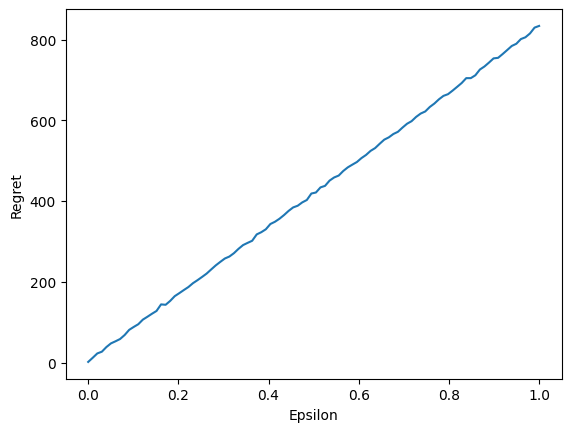

In [7]:
# The regret of Epsilon-Greedy Algorithm for different epsilon

Epsilon = np.linspace(0, 1, 100)
Regret = [epsilonGreedy(x)[1] for x in Epsilon]
plt.plot(Epsilon, Regret)
plt.xlabel('Epsilon')
plt.ylabel('Regret')
plt.show()

The figure above shows the result of the simulation about how the regret is related to $\epsilon $.

Our intuitive conclusions from the figure (suppose $R$ is the regret):

- The increase in $\epsilon$ leads an increase in $R$.
- $R=k\epsilon $, where $k$ is a positive constant. (We can infer that $k\approx800$ from the figure.)
- We may choose $\epsilon=0$ to optimize this algorithm.

In [32]:
# Our enhanced version of Epsilon-Greedy Algorithm:

# By designating weight to the random choice with regard to the result of the prior exploitation phase.
def randomChoose(a, b): # a, b represent the prior estimation.
    u = np.random.uniform(0, 1)
    if u <= a:
        return 0
    elif u <= b:
        return 1
    else:
        return 2

# The Algorithm    
def epsilonGreedy(epsilon):
    totalRegret = 0
    totalReward = 0
    for trial in range(trialNumber):
        # Initializing the variables
        rewards = np.zeros(N)
        reward = 0
        count = np.zeros(armNumber)
        estimatedMeans = np.zeros(armNumber)
        # Conducting the experiment
        for i in range(N): # i starts from 0, ends at N-1
            # Select and pull the arm by the enhanced version of Epsilon-Greedy Algorithm, learning from the past results.
            if i == 0:
                a = 1/3
                b = 2/3
            else:
                a = count[0]/i
                b = (count[0] + count[1])/i
            u = np.random.uniform(0, 1)
            if u <= epsilon:
                arm = randomChoose(a, b) # Instead of randomChoose()
            else:
                arm = np.argmax(estimatedMeans)
            # Update the information
            rewards[i] = bernSample(theta[arm])
            reward += rewards[i]
            count[arm] += 1
            estimatedMeans[arm] += (rewards[i] - estimatedMeans[arm])/count[arm]
            # Exploit the player's action and lower the mean if the arm with highest mean was chosen too frequently
        totalRegret += 0.7*N - reward
        totalReward += reward
    meanRegret = totalRegret/trialNumber
    meanReward = totalReward/trialNumber
    resualt = [meanReward, meanRegret]
    return resualt

print("Epsilon-greedy Algorithm (0 ≤ epsilon ≤ 1):")

output = epsilonGreedy(0.1)
print("\nEpsilon = 0.1:")
print("Mean aggregated rewards: %f" %(output[0]))
print("Mean regret: %f" %(output[1]))

output = epsilonGreedy(0.5)
print("\nEpsilon = 0.5:")
print("Mean aggregated rewards: %f" %(output[0]))
print("Mean regret: %f" %(output[1]))

output = epsilonGreedy(0.9)
print("\nEpsilon = 0.9:")
print("Mean aggregated rewards: %f" %(output[0]))
print("Mean regret: %f" %(output[1]))

Epsilon-greedy Algorithm (0 ≤ epsilon ≤ 1):

Epsilon = 0.1:
Mean aggregated rewards: 3440.720000
Mean regret: 59.280000

Epsilon = 0.5:
Mean aggregated rewards: 3261.330000
Mean regret: 238.670000

Epsilon = 0.9:
Mean aggregated rewards: 2839.320000
Mean regret: 660.680000


It also turns out that this optimization is rather successful especially when choosing a proper $\epsilon$ (a relatively small one):   
The table of regret:
| Algorithms/$\epsilon$ | Original $\epsilon$-greedy | Our enhanced $\epsilon$-greedy |
| --------------------- | -------------------------- | ------------------------------ |
| $\epsilon=0.1$        | 86.415000                  | 59.280000                      | 
| $\epsilon=0.5$        | 421.590000                 | 238.670000                     |
| $\epsilon=0.9$        | 752.195000                 | 660.680000                     |  

We conjectured that this enhancement can prevent the linear regret caused by absolute randomness with each probability of $\frac{1}{3}$, by improving the average-case regret, since we assigned the weight from our past results empirically.

2. The UCB Algorithm conducts these two phases together in each round:  
   
   In our implementation, `estimatedMeans[i]` represents the exploitation work, and `c * np.sqrt(2*np.log(i)/count[i])` represents the exploration work with a constant $c$ representing the trade-off. Since we have already talked about the delimitation of the confidence interval in the last part and proposed a optimised version there, we only consider $c$, the weight while balancing two phases, namely trade-off. 

   From the figure below, we can draw the conclusion that:  

   We should put more emphasis on

Suppose $R_x$ is the regret when $c=x$. 

The data we collected tells us that $R_1<R_5<R_{10} $. We can give a intuitive guess that $c=c* $ which optimize this algorithm satisfies that $0<c*<5$. Thus we may find $c*$ by searching the interval $(0,5) $.

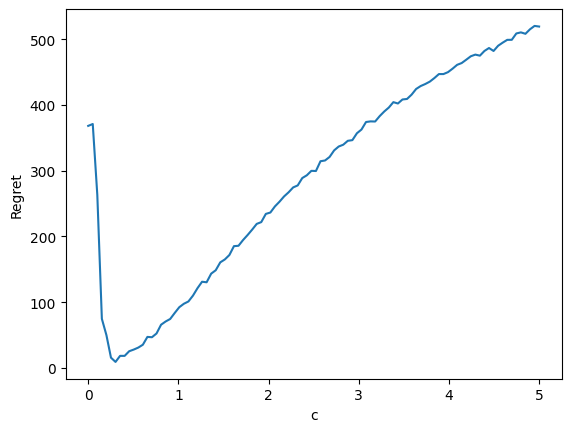

In [11]:
# The regret of UCB Algorithm for different c

c = np.linspace(0, 5, 100)
Regret = [ucb(x)[1] for x in c]
plt.plot(c, Regret)
plt.xlabel('c')
plt.ylabel('Regret')
plt.show()

The figure above shows the result of our simulation about how the regret is related to $c$. 

Our intuitive conclusions from the figure:

- When $c<c*$, the increase in $c$ leads a decrease in the regret.
- When $c>c*$, the increase in $c$ leads an increase in the regret.
- $0<c*<0.5$.
- We may choose $c=c*$ to optimize this algorithm.

More accurately:

In [18]:
c_star=np.argmin(Regret) * (5 / 100)
print("c_star = %f"%(c_star))

c_star = 0.300000


The result of the simulation tells us that $c*\approx 0.3$.

3. The TS Algorithm also conducts these two phases together in each round:  

    Since this algorithm is based on Bayes Analysis and the conjugacy of Beta distribution, according to our analysis before, we could conclude that:   

    This algorithm puts more emphasis on exploration in the initial period (when parameters of Beta distribution is relatively small, indicating lacking of "experience"). While during the later period, it's focus veers to the exploitation, with more dependency on the past experience. It's worth nothing that this trade-off is automatically done due to the conjugacy of Beta distribution. 
    
    We surmise that the advantage of this trade-off approach is that more exploration in the initial period ensures the right direction of the later experiments with less regret, and our experiment shows that this is the best approach to trade-off among all the algorithms provided.

The exploitation and exploration phases are not absolutely separate. Taken the TS Algorithm for an example, both the initial period and the later period involve exploitation and exploration, and the difference is that for every round which phase we put more emphasis on.

### Dealing with the dependent case:
1. Our definition of "dependent":
   
   For the independent case, we consider that the distribution of reward of each arm does not change and is independent with each other and with the past choices of the players. With regard to "dependent", it refers that the bandit can also somehow learn from the past situations and "exploit" the actions of the players in order to minimize our reward. This is related to the problem known as "Adversarial Bandits". 

2. Comparison with the classic Stochastic Bandits and analysis:

   NOTE: This part is inspired by: Bandit Algorithms, T. Lattimore & C. Szepesvari, 2020, Chapter 11: The Exp3 Algorithm, and we will quote the idea of the book in ***inclined letter***.

   Although the bandit can observe our past actions, we still have two advantages:
   
   - We always go one step ahead of the bandit.
   - Consequently, we can conduct "exploration" while the bandit cannot.
   
   These two advantages ensures that in the process of confronting the evil bandit, we can still optimize our reward.

   Besides, the book provides two analysis for the actual algorithms. The relatively weaker one is that *the worst-case stochastic regret is upper-bounded by the worst-case adversarial regret.* And the stronger one says *sublinear worst-case regret is only possible by using a randomised policy.*

   This tells us that the core of our algorithm is designing a function that can read our past experiment and generate a new **distribution** of the action in the next round. Note that the algorithm for the Stochastic Bandits that generates deterministic choice is no more functional.

3. Design thought:
   
   The target distribution of our algorithm can actually be regarded as a conditional probability:

   $$
   P_t = P(A_t = i \mid A_1, A_2, \cdots, A_{t-1})(0 < t \leq N, i\in\{1, 2, 3\})
   $$
   
   where $t$ is the current round and $A_t\in\{1, 2, 3\}$ is the chosen arm.

   It's natural that when considering the past experiment, we assign weight to each arm according to our estimated distribution. However, we should also consider: **If the past experiment is reliable (with more round involved or other judgement), we should give more consideration of the weight of the arm with the highest mean, and the distribution curve will gather around that arm. Conversely, if the past experiment is less reliable, less weight will be considered into the arm with the highest mean (still more than those with lower mean), and the distribution curve will be more stable (uniform).** 
   
   The illustration of this intuition is shown below:
   
   **NOTE: The data presented in the following figures are assumed and used for illustrative purpose to visualize the relationships between data points. They are not real data.**

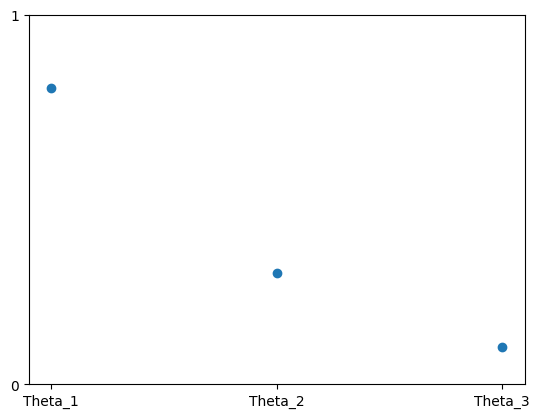

In [13]:
# The distribution curve gathers around the arm with the highest mean, this involves more exploitation.
x = [1/3, 2/3, 1]
y = [0.8, 0.3, 0.1] #assumed
plt.scatter(x, y)
x_labels = ['Theta_{}'.format(i+1) for i in range(len(x))]
plt.xticks(x, x_labels)
plt.yticks([0, 1])
plt.show()


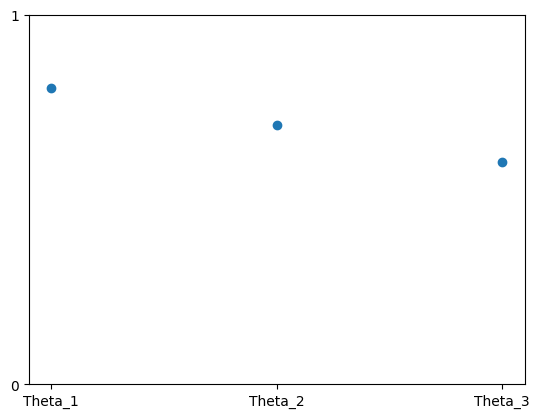

In [14]:
# The distribution curve is more stable (uniform) around the arm with the highest mean, this involves more exploration.

y = [0.8, 0.7, 0.6] #assumed
plt.scatter(x, y)
plt.ylim(0, 1)
plt.xticks(x, x_labels)
plt.yticks([0, 1])
plt.show()

   This is actually a kind of exploration-exploitation trade-off: when the distribution curve gathers around an arm, we are actually putting more emphasis on exploitation, and **this is done at the initial period**. If the distribution curve is more stable (uniform), we are doing more exploration, and **this is done at later period**.

   Fortunately, we have found a very suitable algorithm for this, which is **Softmax Transformation**:

   This is a method for converting a set of real numbers (in this problem: weight - $\{w_1, w_2, w_3\}$) into a probability distribution. 
   

   $$
   p_i = \dfrac{e^{w_i/\tau}}{\displaystyle\sum_{j}e^{w_j/\tau}}, (i \in \{1,2,3\}, \tau > 0)
   $$
   
   
   It has a parameter $\tau$ (a.k.a. the temperature parameter) that determines how much consideration of wight we make when designing the new distribution. A greater $\tau$ leads to a more stable (uniform) distribution, while a smaller $\tau$ leads to more concentration of probabilities around the arms with higher weights (means). 

4. Design details:
   
   - How to design a bandit that can learn and exploit: since our algorithm should have sublinear regret with respect to time, we are actually putting more emphasis on the arm with the highest true mean. Therefore, the bandit will observe that if we choose the arm with the highest mean too frequently (this is defined by a proportionality coefficient according to the proportion of their mean), it will automatically modulate the award ditribution of that arm and lower it's mean (but the order of the three means still remains).  
   
   - The wight is assigned by the mean of the latest estimated distribution for each arm. 

   - A new choice distribution is generated according to the weight and Softmax Transformation. And we sample from that new distribution to decide our next choice. Note that $\tau$ is decreasing with more experiments and more certainty of the distribution.

The Python code is shown as follows:

In [154]:
# Algorithm for Adversarial Bandits
def randomChoose(a, b): # a, b represent the consideration of weights in the new distribution, 0 < a < b < 1.
    u = np.random.uniform(0,1)
    if u <= a:
        return 0
    elif u <= b:
        return 1
    else:
        return 2

# The Algorithm    
def adverseBandit(c): # c is a constant used for defining the temperature parameter tau
    totalRegret = 0
    totalReward = 0
    for trial in range(trialNumber):
        # Initializing the variables
        rewards = np.zeros(N)
        reward = 0
        count = np.zeros(armNumber)
        estimatedMeans = np.zeros(armNumber)
        # Conducting the experiment
        for i in range(N): # i starts from 0, ends at N-1
            tau = c / (i+1) # The temperature parameter, we will expand on this below.
            # Select and pull the arm by the enhanced version of Epsilon-Greedy Algorithm, learning from the past results.
            sum = estimatedMeans[0] + estimatedMeans[1] + estimatedMeans[2]
            if sum == 0:
                w0 = 1
                w1 = 1
                w2 = 1
            else:
                # The wight is assigned by the mean of the latest estimated ditribution for each arm:
                w0 = estimatedMeans[0]/sum
                w1 = estimatedMeans[1]/sum
                w2 = estimatedMeans[2]/sum
            sum = math.exp(w0/tau) + math.exp(w1/tau) + math.exp(w2/tau)
            # Implementing the Softmax Transformation
            a = math.exp(w0/tau)/sum
            b = math.exp(w0/tau)/sum + math.exp(w1/tau)/sum
            # The arm sampled from the new distribution:
            arm = randomChoose(a, b) 
            # Update the information:
            rewards[i] = bernSample(theta[arm])
            reward += rewards[i]
            count[arm] += 1
            estimatedMeans[arm] += (rewards[i] - estimatedMeans[arm])/count[arm]
            # Exploit the player's action and lower the mean if the arm with highest mean was chosen too frequently
            if count[0] > 0.7 * i: # If the arm 0 was chosen too frequently
                theta[0] -= 0.1 / (i+1) * (theta[0] - theta[1] - 0.15) # Lower the mean of arm 0
        totalRegret += 0.7*N - reward
        totalReward += reward
    meanRegret = totalRegret/trialNumber
    meanReward = totalReward/trialNumber
    resualt = [meanReward, meanRegret]
    return resualt

output = adverseBandit(10)
print("Mean aggregated rewards: %f" %(output[0]))
print("Mean regret: %f" %(output[1]))


Mean aggregated rewards: 3228.530000
Mean regret: 271.470000


Explanation of the code: 

1. The update rule of the estimated means is the same as the UCB.

2. We define the $\tau$ by `tau = c / (i+1)`: the numerator $c$ can be numbers from 9 to 23, and this is interval chosen deliberately after testing integers from 8 to 100, and the denominator is chosen to be linear with $i$ after testing sublinear functions like log and square root. Also, this cannot exceed linear too much since if the time slot is large, there might be `math range error`.

3. The bandit lowers the probability by `theta[0] -= 0.1 / (i+1) * (theta[0] - theta[1] - 0.15)`. This is mostly designed by avoiding the maximum oracle mean `theta[0]` to decrease under or too close to the second maximum `theta[1]`.

**Conclusion:**

This algorithm performs well when the bandit can learn and exploit by itself. And if we choose not to generate any distribution, but only choose the arm with the greatest estimated mean (generate a deterministic), the regret is higher.

## Part II: Bayesian Bandit Algorithms(Optional)
### Check the behavior of the policy
Given the prior parameters $\alpha_i , \beta_i$, success probability $\theta_i$ and the reward $\gamma $, now we are computing the regret using the policy that choose the arm with maximal expected $\theta_i$.

In [4]:
# simulation code
def check(alpha1, beta1, alpha2, beta2, theta_1, theta_2, Gamma):
    totalRegret = 0
    for i in range(trialNumber):
        reward = 0 # total reward of each trail
        oracle_value = 0
        reward_j = 1 # the reward of the j-th pull
        maxTheta = max(theta_1, theta_2)
        for j in range(N):
            oracle_value += maxTheta * reward_j
            expected_theta_1 = alpha1 / (alpha1 + beta1) 
            expected_theta_2 = alpha2 / (alpha2 + beta2)
            u = random.uniform(0, 1)
            if expected_theta_1 >= expected_theta_2 : # choose the first arm
               if u <= theta_1 :
                   reward += reward_j
                   alpha1 += 1
               else:
                   beta1 += 1
            else:   # choose the second arm
                if u <= theta_2 :
                   reward += reward_j
                   alpha2 += 1
                else:
                   beta2 += 1
            reward_j *= Gamma
        totalRegret += oracle_value - reward
    return totalRegret/trialNumber

Suppose $\theta_1 =0.7, \theta_2 =0.2,\gamma=0.7$. Now we are checking the behaviour of this policy given $(\alpha_1,\beta_1,\alpha_2,\beta_2)=(1,1,1,1) $, $(\alpha_1,\beta_1,\alpha_2,\beta_2)=(2,1,1,2)$ and $(\alpha_1,\beta_1,\alpha_2,\beta_2)=(1,2,2,1)$.

For the convenience of implementation, **we set the time slot to be $N$(5000) instead of infinity.** This is reasonable since the tail experiments generate trivial regret.

In [10]:
parameter = [[1, 1, 1, 1], [2, 1, 1, 2], [1, 2, 2, 1]]
theta_1 = 0.7
theta_2 = 0.2
Gamma = 0.7
oracleValue = 0
for i in range(N): oracleValue += Gamma ** i
print("Oracle value: %f\n"%(oracleValue))
for data in parameter:
    regret = check(data[0], data[1], data[2], data[3], theta_1, theta_2, Gamma)
    print("Prior parameter:",data)
    print("Mean reward: %f" %(oracleValue - regret))
    print("Mean regret: %f\n" %(regret))

Oracle value: 3.333333

Prior parameter: [1, 1, 1, 1]
Mean reward: 3.388842
Mean regret: -0.055508

Prior parameter: [2, 1, 1, 2]
Mean reward: 3.335177
Mean regret: -0.001844

Prior parameter: [1, 2, 2, 1]
Mean reward: 3.284302
Mean regret: 0.049031



### A counter-example leading to suboptimal regret:

As is mentioned in the analysis of TS algorithm in part I, the choice of the prior distribution has enormous effect on the regret, and if we are not absolutely sure about the relationships of the real distribution, we had better set the parameters of the prior distribution $\alpha_j, \beta_j$ as small as possible, e.g. $(1, 1)$. (As is analyzed before, this is aimed to weaken the awful impact of large parameters, since if the prior distribution of large parameters is disparate from the actual distribution (oracle value) (e.g. $\text{Beta}(200, 800)$ with actual distribution $\text{Bern}(0.9)$), the offset is overly hard to correct, and the incipient experiments may cause a great amount of regret.)

The code snippet exemplifying this is shown as follows:

In [4]:
data = [150, 850, 850, 150]
theta_1 = 0.7
theta_2 = 0.2
Gamma = 0.7
oracleValue = 0
for i in range(N): oracleValue += Gamma ** i
print("Oracle value: %f\n"%(oracleValue))
regret = check(data[0], data[1], data[2], data[3], theta_1, theta_2, Gamma)
print("Prior parameter:",data)
print("Mean regret: %f\n" %(regret))

Oracle value: 3.333333

Prior parameter: [150, 850, 850, 150]
Mean regret: 1.677078



From the output, we could draw the conclusion that when the prior distribution is disparate from the actual distribution with large parameters, the regret will be high. (Since $\gamma$ ranges from 0 to 1, the regret seems still trivial, but now it takes up much higher proportion of the oracle value.)

### The proof of the equation
Suppose

$$
R_1(\alpha_1,\beta_1)=\frac{\alpha_1}{\alpha_1+\beta_1}(1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2))+\frac{\beta_1}{\alpha_1+\beta_1}\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)
$$

$$
R_2(\alpha_2,\beta_2)=\frac{\alpha_2}{\alpha_2+\beta_2}(1+\gamma R(\alpha_1,\beta_1,\alpha_2+1,\beta_2))+\frac{\beta_2}{\alpha_2+\beta_2}\gamma R(\alpha_1,\beta_1,\alpha_2,\beta_2+1)
$$
Then we have $R(\alpha_1,\beta_1,\alpha_2,\beta_2)=\max\{R_1(\alpha_1,\beta_1),R_2(\alpha_2,\beta_2)\} $, where $R(\alpha_1,\beta_1,\alpha_2,\beta_2)$ is the expected total reward under an optimal policy when the prior parameters are $\alpha_1,\beta_1,\alpha_2,\beta_2$.

#### proof
Let $R_1'(\alpha_1,\beta_1,\alpha_2,\beta_2)$ be the expected total reward under an optimal policy if we choose arm 1 in the first pull, and we define $R_2'(\alpha_1,\beta_1,\alpha_2,\beta_2)$ similarly. Since the first pull is either arm 1 or arm 2, we have $R(\alpha_1,\beta_1,\alpha_2,\beta_2)=\max\{R_1'(\alpha_1,\beta_1,\alpha_2,\beta_2),R_2'(\alpha_1,\beta_1,\alpha_2,\beta_2)\} $.

Suppose we choose arm 1 in the first pull:

If the first pull results in a success, we will obtain 1 as a reward. Then we update the prior parameters to $(\alpha_1+1,\beta_1,\alpha_2,\beta_2) $ for the next pull. Now we start a new process and regard the second pull as the first pull, the expected total reward under an optimal policy is $R(\alpha_1+1,\beta_1,\alpha_2,\beta_2)$. Since the reward is $\gamma^{t-1}$ at $t^{th}$ pull and we pull infinite times, the reward at $s^{th}$ pull in the new process is the reward at $s+1^{st} $ pull in the original process, $\text{i.e.} \gamma^s=\gamma \cdot \gamma^{s-1} $. Then we will obtain $\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2) $ in reward. Thus the total reward is $1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2) $ if the first pull succeeds.
 
If the first pull fails, we will not obtain any reward. And then we update the prior parameters to $(\alpha_1,\beta_1+1,\alpha_2,\beta_2) $ for the next pull. Similarly as before, we will obtain $\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)$ as a reward if we follow the optimal policy.

Since the first pull succeeds with expected probability $\dfrac{\alpha_1}{\alpha_1+\beta_1} $ and fails with expected probability $\dfrac{\beta_1}{\alpha_1+\beta_1}$, the expected total reward we obtain if we pull arm 1 first is 

\begin{align*}
R_1'(\alpha_1,\beta_1,\alpha_2,\beta_2)&=E[E(\theta_1 (1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2))+(1-\theta_1)\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)\mid{(\alpha_1,\beta_1,\alpha_2,\beta_2)})]\\&
=E[\theta_1 (1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2))+(1-\theta_1)\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)]\\&
=\frac{\alpha_1}{\alpha_1+\beta_1}(1+\gamma R(\alpha_1+1,\beta_1,\alpha_2,\beta_2))+\frac{\beta_1}{\alpha_1+\beta_1}\gamma R(\alpha_1,\beta_1+1,\alpha_2,\beta_2)
\end{align*}
By symmetric,

$$
R_2'(\alpha_1,\beta_1,\alpha_2,\beta_2)=\frac{\alpha_2}{\alpha_2+\beta_2}(1+\gamma R(\alpha_1,\beta_1,\alpha_2+1,\beta_2))+\frac{\beta_2}{\alpha_2+\beta_2}\gamma R(\alpha_1,\beta_1,\alpha_2,\beta_2+1)
$$
Note that $R_1(\alpha_1,\beta_1)=R_1'(\alpha_1,\beta_1,\alpha_2,\beta_2),R_2(\alpha_2,\beta_2)=R_2'(\alpha_1,\beta_1,\alpha_2,\beta_2)$, we obtain 
$$
R(\alpha_1,\beta_1,\alpha_2,\beta_2)=\max\{R_1'(\alpha_1,\beta_1,\alpha_2,\beta_2),R_2'(\alpha_1,\beta_1,\alpha_2,\beta_2)\}=\max\{R_1(\alpha_1,\beta_1),R_2(\alpha_2,\beta_2)\}
$$

## Ending
Bandit learning is significant for understanding decision-making under uncertainty. It has applications in psychology, behavioral economics, AI, and helps analyze choices, rewards, and optimization strategies in various domains, such as market competition and machine learning. In computer science, bandit learning problem has extensive applications, particularly in reinforcement learning and algorithm optimization.

Our study has presented the implementation, simulation, analysis and optimization of some classical algorithms for Stochastic Bandits and explored the Adversarial Bandits by raising a self-designed algorithm. Besides, we also conducted some further analysis with regard to Bayesian Bandits if the reward is decreasing as we pull. We have displayed the behaviour of the policy that choose the arm with maximal expected $\theta_i$ in such a situation. Then we have also shown that this is not optimal policy given the prior parameters and found the reward in the optimal policy.

However, this study is rather "superficial" and there are still much more issues that warrant further exploration.